In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv(r"C:\Users\singh\Machinelearning\notebook\data\stud.csv")

In [8]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [15]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [16]:
df.shape

(1000, 8)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.select_dtypes(include='object').columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [25]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [28]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Exploring Data


In [32]:
print("Categories in 'gender' variable", end="")
print(df['gender'].unique())
print("Categories in 'race_ethinicity' variable", end="")
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable", end="")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable", end="")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable", end="")
print(df['test_preparation_course'].unique())





Categories in 'gender' variable['female' 'male']
Categories in 'race_ethinicity' variable['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable['standard' 'free/reduced']
Categories in 'test_preparation_course' variable['none' 'completed']


In [37]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categotical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} in numerical features: {} '.format(len(numerical_features), numerical_features))
print('We have {} in categorical features:{} '.format(len(categotical_features), categotical_features))

We have 3 in numerical features: ['math_score', 'reading_score', 'writing_score'] 
We have 5 in categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3


In [43]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [51]:
##Different ways to get the same thing we can use len also to count ,if we are using count we need to add  acolumn as it will return a series not a single value

math_score_100=df[df['math_score']==100]['total_score'].count() ##any column can be used here
print("Number of students who scored 100 in math:",math_score_100)
reading_score_100=len(df[df['reading_score']==100])
print("Number of students who scored 100 in reading:",reading_score_100)
writing_score_100=(df['writing_score']==100).sum()
print("Number of students who scored 100 in writing:",writing_score_100)

Number of students who scored 100 in math: 7
Number of students who scored 100 in reading: 17
Number of students who scored 100 in writing: 14


In [53]:
math_score_20=df[df['math_score']<=20]['total_score'].count()
print("Number of students who scored less than or equal to 20 in math:",math_score_20)
reading_score_20=len(df[df['reading_score']<=20])
print("Number of students who scored less than or equal to 20 in reading:",reading_score_20)
writing_score_20=df[df['writing_score']<=20]['average_score'].count()
print("Number of students who scored less than or equal to 20 in writing:",writing_score_20)

Number of students who scored less than or equal to 20 in math: 4
Number of students who scored less than or equal to 20 in reading: 1
Number of students who scored less than or equal to 20 in writing: 3


Histrogram and KDE

<Axes: xlabel='average_score', ylabel='Count'>

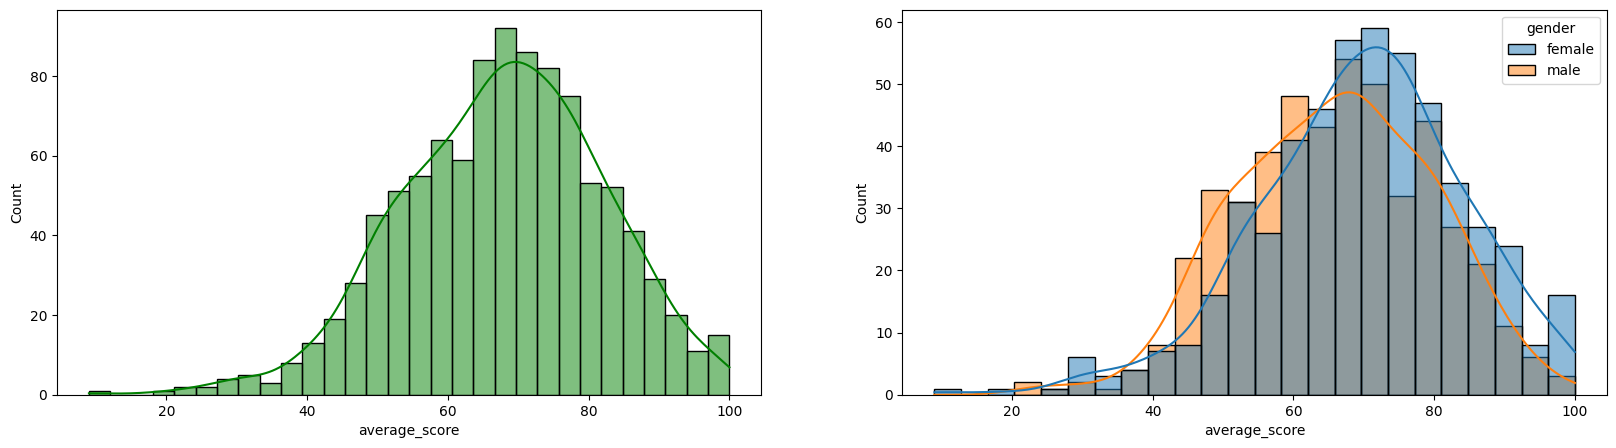

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(121)
sns.histplot(data=df, kde=True, color='g', bins=30, x='average_score')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True,hue='gender')
